# Aprendizaje Supervisado

* Regresión 
    * Modelos: 
        - Regresión Lineal
        - Árbol de Desición
        - K-nearest neighbors
    * Evaluación:
        - MAE
        - MSE/RMSE
* Clasificación
    * Modelos:
        - Árbol de Decisión
        - Support Vector Machines
        - K-nearest neighbors
        - Random Forest
        - Perceptrón
    * Evaluación:
        - Clasificación Binaria
        - Exactitud
        - Precisión/Exhaustividad (Recall)
        - F-Score
        - Matriz de Confusión

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

UsageError: Line magic function `%` not found.


In [3]:
# Import the housing information for analysis 
housing = pd.read_csv('housing.csv', index_col=0)
housing.head()

,LSTAT,INDUS,NOX,RM,MEDV
0,4.98,2.31,0.538,6.575,24.0
1,9.14,7.07,0.469,6.421,21.6
2,4.03,7.07,0.469,7.185,34.7
3,2.94,2.18,0.458,6.998,33.4
4,5.33,2.18,0.458,7.147,36.2


* Los coeficientes de correlación están estandarizados. Por lo tanto, una relación lineal perfecta da como resultado un coeficiente de 1. La correlación mide tanto la fuerza como la dirección de la relación lineal entre dos variables.
* Los valores de covarianza no están estandarizados. Por consiguiente, la covarianza puede ir desde infinito negativo hasta infinito positivo. Por lo tanto, el valor de una relación lineal perfecta depende de los datos. Puesto que los datos no están estandarizados, es difícil determinar la fuerza de la relación entre las variables.* 

In [4]:
# Use covariance to calculate the association
housing.cov()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,50.994760,29.580270,0.488946,-3.079741,-48.447538
INDUS,29.580270,47.064442,0.607074,-1.887957,-30.520823
NOX,0.488946,0.607074,0.013428,-0.024603,-0.455412
RM,-3.079741,-1.887957,-0.024603,0.493671,4.493446
MEDV,-48.447538,-30.520823,-0.455412,4.493446,84.586724


In [5]:
# Use correlation to calculate the association is more appropriate in this case
housing.corr()

,LSTAT,INDUS,NOX,RM,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,0.695360
MEDV,-0.737663,-0.483725,-0.427321,0.695360,1.000000


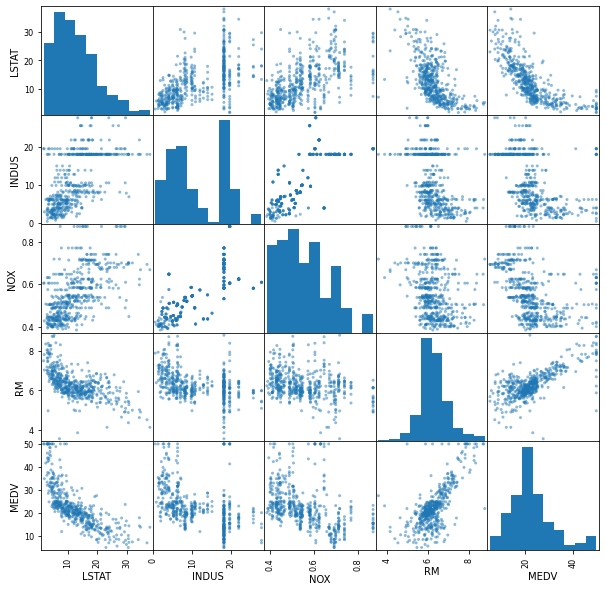

In [7]:
# scatter matrix plot
from pandas.plotting import scatter_matrix
sm = scatter_matrix(housing, figsize=(10, 10))

## Observe the association between RM and MEDV:

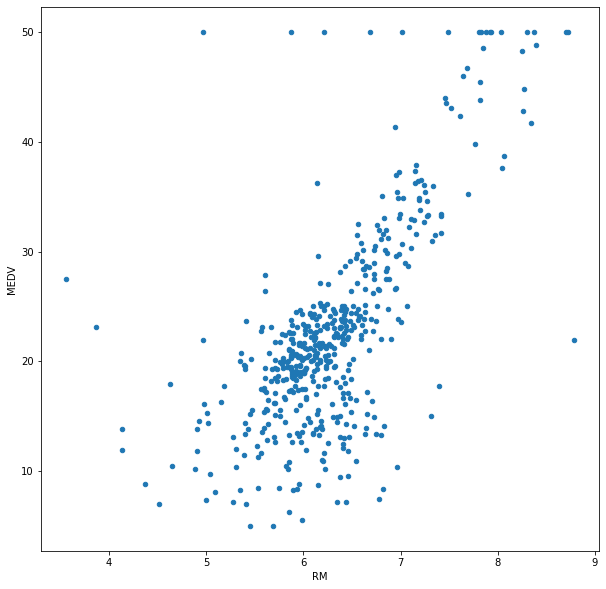

In [36]:
# This time we take a closer look at MEDV vs RM What is the association between MEDV and RM you observed?
housing.plot(kind='scatter', x='RM', y='MEDV', figsize=(10, 10))

## Regresion Lineal Simple

Supuestos:
* Linealidad
* Independencia
* Normalidad
* Igual Varianza


$y_i = \beta_0 + \beta_1 * x_i + \epsilon_i $

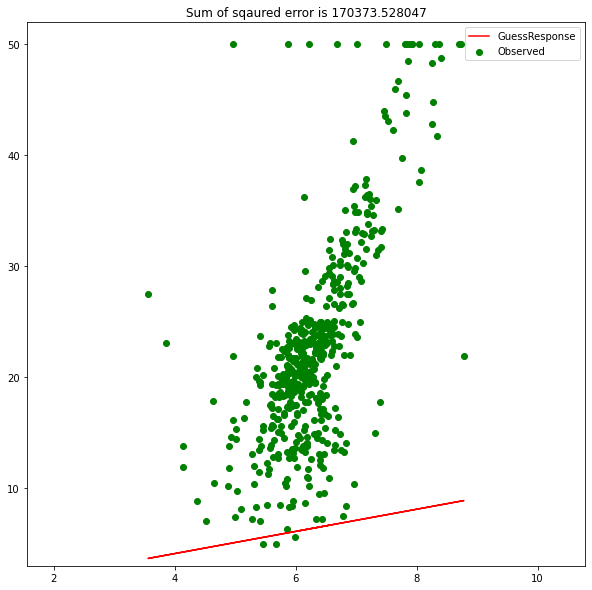

In [37]:
b0 = 0.1
b1 = 1
housing['GuessResponse'] = b0 + b1*housing['RM']

housing['observederror'] = housing['MEDV'] - housing['GuessResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
plt.title('Sum of sqaured error is {}'.format((((housing['observederror'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

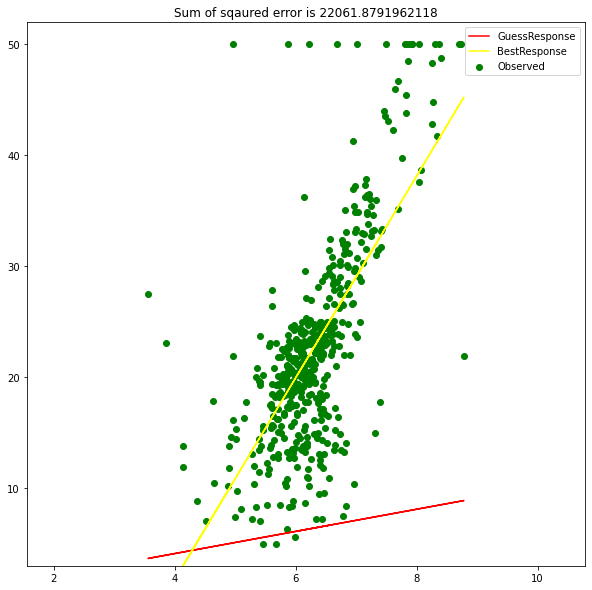

In [38]:
# Input the formula (refer to the lecture video 4.3)
formula = 'MEDV~RM'
model = smf.ols(formula=formula, data=housing).fit()

b0_ols = model.params[0]
b1_ols = model.params[1]

housing['BestResponse'] = b0_ols + b1_ols*housing['RM']

# Also want to know the error of of guess...
housing['error'] = housing['MEDV'] - housing['BestResponse']


# plot your estimated line together with the points
plt.figure(figsize=(10, 10))
# See if the error drops after you use least square method
plt.title('Sum of sqaured error is {}'.format((((housing['error'])**2)).sum()))
plt.scatter(housing['RM'], housing['MEDV'], color='g', label='Observed')
plt.plot(housing['RM'], housing['GuessResponse'], color='red', label='GuessResponse')
plt.plot(housing['RM'], housing['BestResponse'], color='yellow', label='BestResponse')
plt.legend()
plt.xlim(housing['RM'].min()-2, housing['RM'].max()+2)
plt.ylim(housing['MEDV'].min()-2, housing['MEDV'].max()+2)
plt.show()

In [16]:
model.summary()
# p-value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        13:57:35   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Linealidad

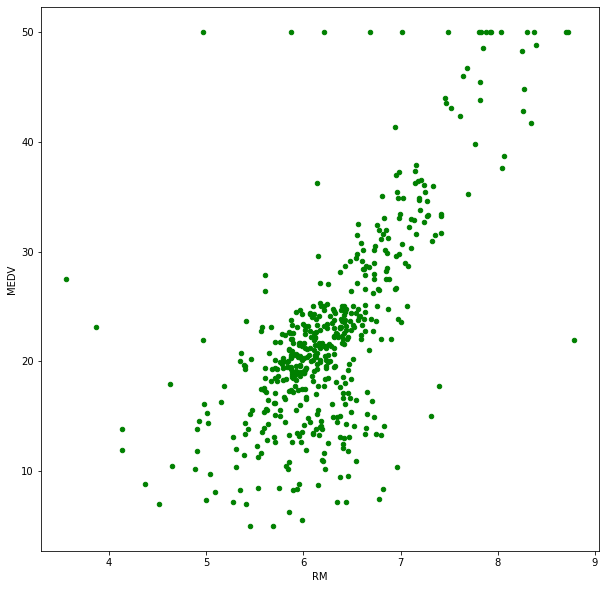

In [34]:
# you can check the scatter plot to have a fast check
housing.plot(kind='scatter', x='RM', y='MEDV', figsize=(10, 10), color='g')

## Independencia

In [32]:
# Get all errors (residuals)
housing['error'] = housing['MEDV'] - housing['BestResponse']

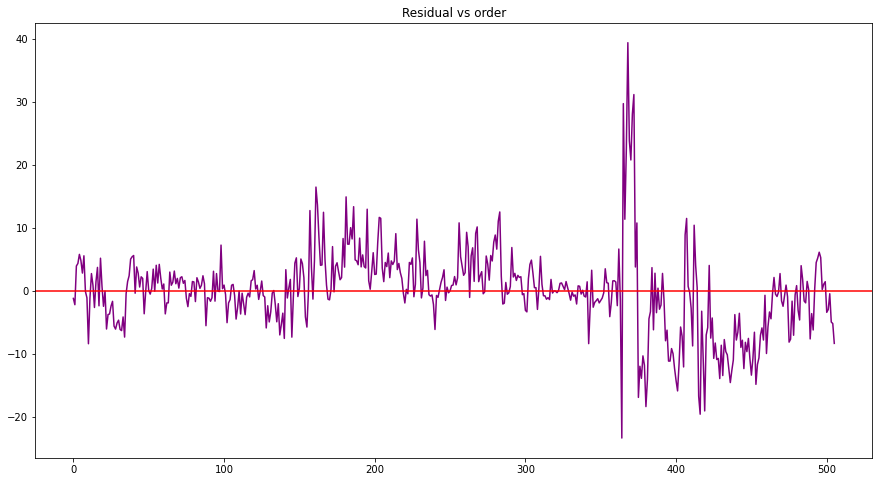

In [33]:
# Method 1: Residual vs order plot
# error vs order plot (Residual vs order) as a fast check 
plt.figure(figsize=(15, 8))
plt.title('Residual vs order')
plt.plot(housing.index, housing['error'], color='purple')
plt.axhline(y=0, color='red')
plt.show()

In [39]:
# Method 2: Durbin Watson Test
# Check the Durbin Watson Statistic
# Rule of thumb: test statistic value in the range of 1.5 to 2.5 are relatively normal
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Fri, 10 Jul 2020   Prob (F-statistic):           2.49e-74
Time:                        14:24:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Normality

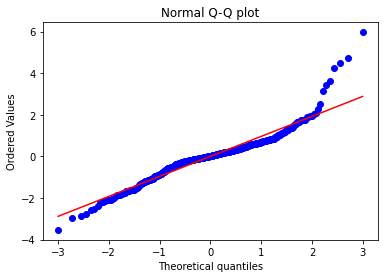

In [40]:
import scipy.stats as stats
z = (housing['error'] - housing['error'].mean())/housing['error'].std(ddof=1)

stats.probplot(z, dist='norm', plot=plt)
plt.title('Normal Q-Q plot')
plt.show()

## Igual Varianza

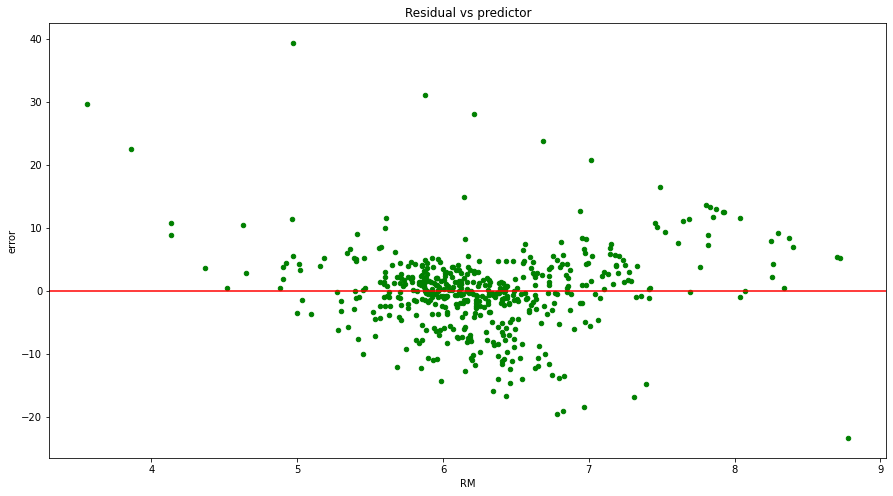

In [41]:
# Residual vs predictor plot
housing.plot(kind='scatter', x='RM', y='error', figsize=(15, 8), color='green')
plt.title('Residual vs predictor')
plt.axhline(y=0, color='red')
plt.show()

In [13]:
import statsmodels.formula.api as smf
model = smf.ols(formula = 'MEDV~RM', data = housing).fit()

In [14]:
model.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [20]:
from sklearn import linear_model as lm

X = housing[['RM']]
y = housing['MEDV']

model = lm.LinearRegression()
results = model.fit(X,y)

print(model.intercept_,model.coef_)

-34.670620776438554 [9.10210898]


## Metricas Regresion Lineal

![](MetricasRL.png)



- MSE : Error cuadratico medioç
    * Promedio de los errores cuadráticos.
    * Siempre es no negativa.
    * Valores cerca de 0 son mejores.
    * El error no está en las mismas unidades que las predicciones.
    * Penaliza fuertemente outliers.
- RMSE : Raiz cuadrada del error cuadrático medio
    * Siempre es no negativa.
    * Valores cerca de 0 son mejores.
    * El error está en las mismas unidades que las predicciones, por lo que se interpreta más fácilmente.
    * Penaliza fuertemente los outliers.
- MAE : Error absoluto medio
    * Siempre es no negativa.
    * Valores cerca de 0 son mejores.
    * Es más fácil de interpretar que RMSE, simplemente la distancia entre la predicción y el error.
    * No es tan sensible a los outliers, porque no eleva al cuadrado.
- MedAE : Error absoluto medio
    * Siempre es no negativa.
    * Valores cerca de 0 son mejors.
    * Es más fácil de interpretar que RMSE, simplemente la distancia entre la predicción y el error.
    * Es más robusta que MAE, para valores extremos.

## Metricas Clasificacion Binaria

![](ClasificacionBinaria.png)


# Evaluar Modelos

![](overfitting_2.png)